In [3]:
"""Code borrowed from sentdex Introduction to Deep Learning https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
it contains some of the comments and modifications I am learning on"""

import tensorflow as tf
from scipy import io as spio
import numpy as np

emnist = spio.loadmat("datasets/matlab/emnist-digits.mat")

##(x_train, y_train), (x_test, y_test)= emnist.load_data() for keras data
# load training dataset
x_train = emnist["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = emnist["dataset"][0][0][0][0][0][1]

#expand the scale of the vectors
x_train = tf.keras.utils.normalize(x_train, axis=1)


model = tf.keras.models.Sequential() #layers follow one after another
model.add(tf.keras.layers.Flatten()) #Flatten the lead to a single line
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu)) #128 nodes in this hidden layer
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu)) #256 nodes in this hidden layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax)) #10 nodes in the output layer picking which value it should be

model.compile(optimizer= 'Adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

model.fit(x_train, y_train, epochs = 3)


Epoch 1/3
240000/240000 [==============================] - 31s 131us/sample - loss: 0.1208 - acc: 0.9649
Epoch 2/3
240000/240000 [==============================] - 31s 131us/sample - loss: 0.0486 - acc: 0.9849
Epoch 3/3
240000/240000 [==============================] - 31s 131us/sample - loss: 0.0360 - acc: 0.9890


40000/40000 [==============================] - 2s 38us/sample - loss: 0.0393 - acc: 0.9877
40000
The sample was 2382
I think it is a 4


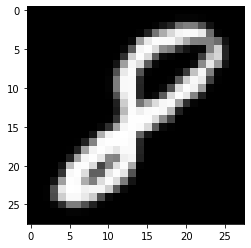

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed()

# load test dataset
x_test = emnist["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = emnist["dataset"][0][0][1][0][0][1]

x_test = tf.keras.utils.normalize(x_test, axis=1)

val_loss, val_acc = model.evaluate(x_test, y_test)
print(len(x_test))
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28, order="A")
# load ONE image from training set to display on screen
prediction = model.predict([x_test])
guess =random.randint(0, len(prediction))
print ('The sample was', guess)
print ('I think it is a', np.argmax(prediction[guess]))
img = x_test[guess]


# trick our generator into believing img has enough dimensions
# and get some augmented images for our single test image
img = np.expand_dims(img, axis=0)

plt.imshow(img.reshape((28,28)), cmap='gray')
plt.show()